In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib
from scipy import fftpack as spfft # for computing spectra
import scipy.signal as spsig

import librosa
import resampy
from subprocess import call

import glob

%matplotlib inline

# Set plot fontsize
matplotlib.rcParams.update({'font.size': 18})

Direct sonification is simply the process of changing the time scale of a signal to transpose it to the audible range. The data should therefore have similarities with sound waves in air, that is:

 - oscillations around an average value (better if this value is 0), a.k.a "stationary" data. 
 - not a vast range of amplitudes in the thing of interest
 - enough cycles to produce sound at the new frequency. 

We take the example of seismic data... but they could be many other things, e.g.:

[planetary:] 

 - ocean waves, tidal data
 - electro-magnetic waves (solar winds?)
 - gravitational waves
 - planetary orbital positions
 
[biological:] 

 - blood pressure
 - ekg brain waves
 
[sociological:] 
 - stock markets (detrended)?  

# EXAMPLE 1: a large earthquake 


## 1. Get the data (and in to python):

In [193]:
DirIn = '/home/ben/data/Kilauea2018_continuous_2/'
DirOut = '/home/ben/Dropbox/x03_datamovies/Kilauea_2018/'

dirlist = glob.glob(DirIn+'/*')
print(dirlist)

file = glob.glob(dirlist[1]+'/*.txt')
print(file)

['/home/ben/data/Kilauea2018_continuous_2/waveforms_OBL', '/home/ben/data/Kilauea2018_continuous_2/waveforms_PUHI']
['/home/ben/data/Kilauea2018_continuous_2/waveforms_PUHI/42905052.txt']


In [194]:
FileNameIn = str(file)[2:-2] # Note that this data has been pre-processed (instrument response removal)
fs = 100 # 
print(type(FileNameIn))
print(FileNameIn)
data = np.loadtxt(FileNameIn,skiprows=1,delimiter = ',',unpack = True)


<class 'str'>
/home/ben/data/Kilauea2018_continuous_2/waveforms_PUHI/42905052.txt


In [195]:
x = data[1,:]
time_vec = data[0,:]


duration = len(x)/fs
print('We have ' + str(len(data)) + ' data points at a sampling frequency fs of ' + str(fs))
print('We have ' + str(int(duration)) + ' seconds of data!')
print('... which is ' + str(int(duration/3600)) + ' hours of data!')

# make time vectors for plotting purposes only
t = np.arange(0,duration,1./fs) # in seconds
t_hours = np.arange(0,duration/3600,1./fs/3600) # in hours

We have 2 data points at a sampling frequency fs of 100
We have 187643 seconds of data!
... which is 52 hours of data!


In [187]:
print(time_vec.shape)
print(t_hours.shape)
print(x[0:100])

(18764300,)
(18764300,)
[0.00000000e+00 5.44709954e-08 2.17961359e-07 4.93188309e-07
 8.82922960e-07 1.38552375e-06 1.99535536e-06 2.70793282e-06
 3.52810199e-06 4.46797725e-06 5.52022509e-06 6.67981113e-06
 7.95517711e-06 9.33959949e-06 1.08207352e-05 1.23782422e-05
 1.40420669e-05 1.58797185e-05 1.78827867e-05 2.00089432e-05
 2.21974807e-05 2.44418147e-05 2.68263833e-05 2.93887785e-05
 3.20466981e-05 3.47728877e-05 3.76615121e-05 4.07205170e-05
 4.39113749e-05 4.70944760e-05 5.02469963e-05 5.35233181e-05
 5.69201797e-05 6.04905328e-05 6.43061344e-05 6.83916982e-05
 7.25953798e-05 7.69070308e-05 8.13996220e-05 8.57913347e-05
 9.00140661e-05 9.41799228e-05 9.86520710e-05 1.03934356e-04
 1.09796097e-04 1.15405473e-04 1.20188251e-04 1.24659459e-04
 1.29594285e-04 1.35023356e-04 1.40667816e-04 1.46336194e-04
 1.52100792e-04 1.58030674e-04 1.63870508e-04 1.69495682e-04
 1.75504199e-04 1.82092255e-04 1.88895800e-04 1.96011995e-04
 2.03136577e-04 2.09932905e-04 2.16883115e-04 2.23891235e-04


In [196]:
print(time_vec.shape)
print(t_hours.shape)
print(x[0:100])

(18764300,)
(18764300,)
[-0.00000000e+00 -4.60986949e-09 -1.85739367e-08 -4.24473060e-08
 -7.54169958e-08 -1.18119401e-07 -1.73321070e-07 -2.37007996e-07
 -3.07767625e-07 -3.92924113e-07 -4.85091548e-07 -5.76785717e-07
 -6.91670103e-07 -8.26910895e-07 -9.65613856e-07 -1.10974675e-06
 -1.25833981e-06 -1.42783869e-06 -1.61165888e-06 -1.80177806e-06
 -1.98073297e-06 -2.17757751e-06 -2.41568104e-06 -2.65065963e-06
 -2.87970451e-06 -3.07037006e-06 -3.27543553e-06 -3.55267224e-06
 -3.78334754e-06 -4.06077028e-06 -4.48945027e-06 -4.85569214e-06
 -5.21707121e-06 -5.51465548e-06 -5.72108704e-06 -6.07287258e-06
 -6.39215698e-06 -6.69081119e-06 -6.97641202e-06 -7.19493857e-06
 -7.67627916e-06 -8.21567494e-06 -8.53726921e-06 -8.97456113e-06
 -9.53250627e-06 -9.91396465e-06 -1.02764440e-05 -1.07342957e-05
 -1.12540595e-05 -1.19903419e-05 -1.26459159e-05 -1.31932664e-05
 -1.37308824e-05 -1.39491191e-05 -1.40881273e-05 -1.43010085e-05
 -1.47554510e-05 -1.54601752e-05 -1.58659545e-05 -1.64080172e-05
 

In [197]:
# Compute the spectrum

###### some useful prerequisites...

# 1) force the signal's mean value to be zero (how to kill your loudspeakers...)
x = x - np.mean(x)

# 2) limit the signal's amplitude = avoid too large peaks (how to re-kill your loudspeakers...)
# a simple way is to normalize the data according to its maximum amplitude value
# data = data/np.amax(data) # This is dangerous, peak values can be negative, too
# better to do it THIS way:  
x_n = x/np.amax(np.absolute(x))

# # Nfft is the number of frequencies to calculate in a discrete signal (i.e. in a computer)
# Nfft = len(data_n)
# f = np.arange(0,fs/2,fs/Nfft) # to get the actual frequency values
# S = spfft.fft(data,Nfft) 
# S = S[:int(Nfft/2)] # remove any information from frequencies higher than Nyquist freq (half the number of points)
# #https://en.wikipedia.org/wiki/Nyquist_frequency

# print('Frequency content ranges from ' + str(f[0]) + ' to ' + str(round(f[-1],3)) + ' Hz...')
# print('log Frequency content ranges from ' + str(np.log10(f[1])) + ' to ' + str(np.log10(f[-1])) + ' [log10(Hz)]')

(0, 52.12305555555555)

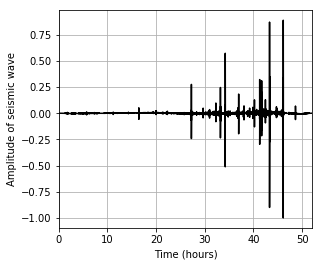

In [198]:
# waveform
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t_hours,x_n,'k') 
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude of seismic wave')
plt.grid()
plt.xlim([0,duration/3600])

# # spectrum: 
# plt.subplot(1,2,2)
# #plt.plot(f,20*np.log10(np.absolute(S)),'k') 
# plt.plot(np.log10(f),20*np.log10(np.absolute(S)),'k') 
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude of seismic wave (dB)')
# plt.grid()
# plt.axis()  

In [167]:
# # SPECTROGRAM !
# # first compute the short time fourier transform STFT
# # "Uncertainty Principle": there is a direct tradeoff between resolution in frequency and in time: 
# # that is governed by the window length NfftSTFT

# # for the full signal spectra, the Nfft (number of frequencies was simply the length of the signal. 
# # instead calculate Nfft upward from the sampling frequency and then window time? 
# # 
# # or 
# duration = len(data)/fs
# numwindows = 1000
# WindowDur = duration/numwindows


# WindowLength = int(WindowDur*fs) # [s] The length of each frame (should be expressed in samples)
# # does this need to be a power of 2 ?  apparently not ! 
# NfftSTFT = WindowLength*2 # you want the Nyquist frequency to be the window length ! (in number of samples, not seconds)

# print('window duration in seconds: ' +str(WindowDur))
# print('window length in samples: ' +str(WindowLength))
# print(NfftSTFT)

# Overlap = int(WindowLength/2) # The overlapping between successive frames (should be expressed in samples)
# # This changes the total number of windows, but has to be smaller than the window length (in samples)

# [fSTFT, tSTFT, STFT] = spsig.spectrogram(data_n, fs, nperseg=WindowLength, noverlap=Overlap, nfft=NfftSTFT) 
# # also provides associated f and t vectors!
# print(STFT.shape)
# #print(fSTFT.shape)
# #print(tSTFT.shape)


In [168]:
# Let's plot the spectrogram
# notice that the y-axis goes up to half of fs ! i.e. Nyquist frequency
# plt.figure(figsize=(8,4))
# plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT))) # dB = 20*log() is a convention
# #plt.ylim([0,fs/8])
# plt.xlim([0,duration-WindowLength/fs])
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# cbar = plt.colorbar()
# cbar.ax.set_ylabel('dB', rotation=270)

In [169]:
# Now make a spectrogram with Librosa ! 



## NOW MAKE SOUND !

In [199]:
OutFileName = FileNameIn[:-4] + '_sonified.wav'

# For the free oscillations, we had a specific frequency that we wanted to shift to another one
# Here we can define a target duration instead

OriginalDuration = duration
TargetDuration = 180.0 # Try playing with this number! What happens to the sound if you make it smaller? Larger?
print('The data is ' + str(int(OriginalDuration)) + '-s long')
print('Let\'s make a ' + str(TargetDuration) + '-second long sound!')

SpeedFactor = OriginalDuration/TargetDuration
print('This corresponds to a speed factor of: ' + str(int(SpeedFactor)))

# (here we are speeding up the playback because the original content is infrasonic / 
# There are cases where we want to do the opposite, e.g. solar magnetic waves, acoustic emissions during rock microcracking...)
# compute the corresponding shift in frequency
# show the result with subplots original data VS. sonified data 
#      (time series / spectrum / spectrogram = no change except in the time scale)

The data is 187643-s long
Let's make a 180.0-second long sound!
This corresponds to a speed factor of: 1042


In [200]:
# So, set the new sampling rate, and then resample to a standard sampling rate
fs_sound = int(fs*SpeedFactor)
#sr_resample = 44100

librosa.output.write_wav(OutFileName, x_n, fs_sound, norm=False)

# Some software have troubles with exotic sampling rates (VLC and audacity don't have), so it might be necessary 
# to resample your sound.
#dataOrig, srOrig = librosa.core.load(DirOut + OutFileName, sr=sr_sound)
#data_rs = resampy.resample(dataOrig, srOrig, sr_resample)
#librosa.output.write_wav(DirOut + OutFileName, data_rs, sr_resample, norm=False)

In [ ]:
# # Original vs. Sonified Data
# plt.figure(figsize=(12*2,6*2))
# plt.subplot(1,2,1)
# plt.plot(t_hours,data_n,'k') 
# plt.xlabel('Time (hours)')
# plt.ylabel('Amplitude of seismic wave\n (normalized to max.)')
# plt.grid()
# plt.xlim([0,OriginalDuration/3600])
# plt.title('Old Seismogram (inaudible)')

# plt.subplot(1,2,2)
# plt.plot(t_hours*3600/SpeedFactor,data_n,'k') 
# plt.xlabel('Time (seconds)')
# plt.grid()
# plt.xlim([0,TargetDuration])
# plt.title('New Seismogram (audible)')

# # The difference is only in the time scale. We compress 14 hours into 12 seconds

# =========================================================
# Example 2: Much longer seismic signal: free oscillations 
### filtering to find a hidden signal ! 

#### Their period typically ranges from 20 minutes to a few hours, i.e. a frequency between, say, approximately 0.0002 and 0.002 Hz

### https://vimeo.com/215665951
### http://lucien.saviot.free.fr/terre/index.en.html 

In [ ]:
# get the data in: 
DirIn = '../0_data_nogit/'

# This is the Sumatra earthquake (2004), recorded by a seimic station located in Albuquerque, NM
FileNameIn = 'Sumatra_2004_ANMO_14wks.VHZ' 
# Note that this data has been pre-processed (instrument response removal)
fs = 0.1 
# Datatype VHZ is downsampled to 0.1 Hz (p=10 s)

data = np.loadtxt(DirIn + FileNameIn)
duration = len(data)/fs

In [ ]:
# make time vectors for plotting purposes only
t = np.arange(0,duration,1./fs) # in seconds
t_hours = np.arange(0,duration/3600,1./fs/3600) # in hours
t_days = np.arange(0,duration/3600/24,1./fs/3600/24) # in days

print('We have ' + str(int(duration)) + ' seconds of data!')
print('... which is ' + str(int(duration/3600)) + ' hours of data!')
print('... which is ' + str(int(duration/3600/24)) + ' days of data!')

In [ ]:
# Compute the spectrum
Nfft = len(data)
f = np.arange(0,fs/2,fs/Nfft)
S = spfft.fft(data,Nfft); S = S[:int(Nfft/2)]
print('Frequency content ranges from ' + str(f[0]) + ' to ' + str(round(f[-1],3)) + ' Hz...')
print('Frequency content ranges from ' + str(np.log10(f[1])) + ' to ' + str(np.log10(f[-1])) + ' [log10(Hz)]')

In [ ]:
# 1) force the signal's mean value to be zero (how to kill your loudspeakers...)
data = data - np.mean(data)

# 2) limit the signal's amplitude = avoid too large peaks (how to re-kill your loudspeakers...)
# but keep the value because we want to compare the power to other data... 
maxabs = np.amax(np.absolute(data))
data_n = data/maxabs

In [ ]:
# plot
S = spfft.fft(data_n,Nfft)
S = S[:int(Nfft/2)]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(t_hours,data_n,'k') 
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude of seismic wave\n (normalized to max.)')
plt.grid()
plt.xlim([0,duration/3600])
plt.subplot(1,2,2)
plt.plot(np.log10(f),20*np.log10(np.absolute(S)),'k') 
plt.xlabel('Log Frequency (Hz)')
plt.ylabel('Amplitude of seismic wave (dB)')
plt.grid()

In [ ]:
plt.figure(figsize=(12,6))
#plt.plot(np.log10(f),np.log10(np.absolute(S)),'k') 
plt.plot(f,np.absolute(S),'k') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude of seismic wave')
plt.grid()
plt.xlim([0.0002, 0.002])

In [ ]:
# SPECTROGRAM !
# first compute the short time fourier transform STFT
# "Uncertainty Principle": there is a direct tradeoff between resolution in frequency and in time: 
# that is governed by the window length NfftSTFT

# for the full signal spectra, the Nfft (number of frequencies was simply the length of the signal. 
# instead calculate Nfft upward from the sampling frequency and then window time? 
# 
WindowDur = 300 # in seconds (can calculate this from the lower end of the frequency spectrum that you want to resolve too)
# or 
duration = len(data)/fs
numwindows = 100
WindowDur = duration/numwindows


WindowLength = int(WindowDur*fs) # [s] The length of each frame (should be expressed in samples)
# does this need to be a power of 2 ?  apparently not ! 
NfftSTFT = WindowLength*2 # you want the Nyquist frequency to be the window length ! (in number of samples, not seconds)

print('window duration in seconds: ' +str(WindowDur))
print('window length in samples: ' +str(WindowLength))
print(NfftSTFT)

Overlap = int(WindowLength/2) # The overlapping between successive frames (should be expressed in samples)
# This changes the total number of windows, but has to be smaller than the window length (in samples)

[fSTFT, tSTFT, STFT] = spsig.spectrogram(data_n, fs, nperseg=WindowLength, noverlap=Overlap, nfft=NfftSTFT) 
# also provides associated f and t vectors!
print(STFT.shape)

# Let's plot the spectrogram
plt.figure(figsize=(10,6))
plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
plt.ylim([0,fs/8])
#plt.xlim([0,dur1-SliceLength/sr])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB', rotation=270)

In [ ]:
outfile_name = '14weeks_Sumatra_nofilt.wav'

OriginalDuration = duration
TargetDuration = 24.0 # Try playing with this number! What happens to the sound if you make it smaller? Larger?
print('The data is ' + str(int(OriginalDuration)) + '-s long')
print('Let\'s make a ' + str(TargetDuration) + '-second long sound!')

SpeedFactor = OriginalDuration/TargetDuration
print('This corresponds to a speed factor of: ' + str(int(SpeedFactor)))

# So, set the new sampling rate, and then resample to a standard sampling rate
sr_sound = int(fs*SpeedFactor)
# resample at 44.100 kHz
sr_resample = 44100
data_rs = resampy.resample(data_n, sr_sound, sr_resample)
librosa.output.write_wav(DirOut + outfile_name, data_rs, sr_resample, norm=False)

# Some software have troubles with exotic sampling rates (VLC and audacity don't have), so it might be necessary 
# to resample your sound. if so, uncomment: 

# sr_resample = 44100
# dataOrig, srOrig = librosa.core.load(DirOut + OutFileName, sr=sr_sound)
# data_rs = resampy.resample(dataOrig, srOrig, sr_resample)
# librosa.output.write_wav(DirOut + OutFileName, data_rs, sr_resample, norm=False)

In [ ]:
# FILTER AROUND THE MODES ! 

#fcenter = 0.000833333
fcenter = 0.00104
#fcenter = 1/(36*60)

Sabs = np.absolute(S)

plt.figure(figsize=(12,6))
plt.plot(f,Sabs,'k') 
plt.plot([fcenter,fcenter],[0,max(Sabs)],'r-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude of seismic wave')
plt.grid()
plt.xlim([0.0002, 0.002])

In [ ]:
Q = 5 # Quality factor: how wide the filter is around fcenter(higher value damps LESS quickly)
FiltOrder = 2; # Filter Order: (how steep the sides are)


BW_SemiWidth = fcenter/(2*Q)
fmin = fcenter-BW_SemiWidth; 
fmax = fcenter+BW_SemiWidth; 
cutofffreq = np.array([fmin, fmax]) / (fs/2);     

b, a = spsig.butter(FiltOrder, cutofffreq, btype='band', analog=False, output='ba')
w, h = spsig.freqz(b, a); 
w = w*fs/np.pi/2

data_filt = spsig.lfilter(b, a, data)
S_filt = spfft.fft(data_filt,Nfft) # compute the spectrum
S_filt = S_filt[:int(Nfft/2)] # up to the Nyquist frequency

print("Center frequency is: " + "%.02E" %(fcenter) + " Hz")
print("Cut-off frequencies are: " + "%.02E" %(fmin) + " Hz & " + "%.02E" %(fmax) + " Hz")

In [ ]:
##### Plot and compare original and filtered signals
fig = plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.plot(t_days,data,'k') 
plt.title("Original signal"); plt.xlabel("Time (days)")
plt.ylim([-0.0015, 0.0015])
plt.grid()
plt.xlim([0, duration/3600/24])

plt.subplot(2,2,2)
plt.plot(t_days,data_filt,'k')
plt.title("Filtered signal"); plt.xlabel("Time (days)")
plt.grid()
plt.xlim([0, duration/3600/24])

plt.subplot(2,3,4)
plt.plot(f,20*np.log10(np.abs(S)),'k',label='Spectrum')
plt.plot(w, 20*np.log10(abs(h))+  + 20*np.log10(np.amax(np.abs(S))),'--g',label='Filt. resp.',linewidth=2)
plt.title("Original spectrum"); plt.xlabel("Freq (Hz)")
plt.ylim([-150., 10.])
plt.grid()
plt.legend(bbox_to_anchor=(0.2, 0.9), loc=3,ncol=2)

plt.subplot(2,3,5)
plt.plot(f,20*np.log10(np.abs(S_filt)),'k',label='Spectrum')
plt.plot(w, 20 * np.log10(abs(h)) + 20*np.log10(np.amax(np.abs(S_filt))),'--g',label='Filt. resp.',linewidth=2)
plt.title("Filtered spectrum"); plt.xlabel("Freq (Hz)")
plt.ylim([-150., 10.])
plt.grid()
plt.legend(bbox_to_anchor=(0.2, 0.9), loc=3,ncol=2)

plt.subplot(2,3,6)
plt.plot(f,20*np.log10(np.abs(S_filt)),'k',label='Spectrum')
plt.plot(w, 20*np.log10(abs(h)) + 20*np.log10(np.amax(np.abs(S_filt))),'--g',label='Filt. resp.',linewidth=2)
plt.xlim([fcenter-8*BW_SemiWidth, fcenter+8*BW_SemiWidth])
plt.title("Filtered spectrum (magnified view)"); plt.xlabel("Freq (Hz)")
plt.ylim([-110., 10.])
plt.grid()
plt.legend(bbox_to_anchor=(0.2, 0.05), loc=3,ncol=2)

# want to save this awesome figure?
#fig.savefig(DirOut + 'SumatraFiltered.png')

In [ ]:
# SPECTROGRAM !

duration = len(data_filt)/fs
numwindows = 100
WindowDur = duration/numwindows


WindowLength = int(WindowDur*fs) # [s] The length of each frame (should be expressed in samples)
# does this need to be a power of 2 ?  apparently not ! 
NfftSTFT = WindowLength*2 # you want the Nyquist frequency to be the window length ! (in number of samples, not seconds)

print('window duration in seconds: ' +str(WindowDur))
print('window length in samples: ' +str(WindowLength))
print(NfftSTFT)

# probably no need to change this. 
Overlap = int(WindowLength/2) # The overlapping between successive frames (should be expressed in samples)

[fSTFT, tSTFT, STFT] = spsig.spectrogram(data_filt, fs, nperseg=WindowLength, noverlap=Overlap, nfft=NfftSTFT) 
# also provides associated f and t vectors!
print(STFT.shape)

# Let's plot the spectrogram
plt.figure(figsize=(10,6))
plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
plt.ylim([0,fs/8])
#plt.xlim([0,dur1-SliceLength/sr])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB', rotation=270)

In [ ]:
# MAKE THE FILTERED SOUND ! 

outfile_name = '14weeks_Sumatra_filt00104.wav'

OriginalDuration = duration
TargetDuration = 14.0 # Try playing with this number! What happens to the sound if you make it smaller? Larger?
print('The data is ' + str(int(OriginalDuration)) + '-s long')
print('Let\'s make a ' + str(TargetDuration) + '-second long sound!')

SpeedFactor = OriginalDuration/TargetDuration
print('This corresponds to a speed factor of: ' + str(int(SpeedFactor)))

# So, set the new sampling rate, and then resample to a standard sampling rate
sr_sound = int(fs*SpeedFactor)
# resample at 44.100 kHz
sr_resample = 44100
data_rs = resampy.resample(data_n, sr_sound, sr_resample)
librosa.output.write_wav(DirOut + outfile_name, data_rs, sr_resample, norm=False)

## EXERCISE: Go back and filter it on different modes (change the file name to tell you the mode), 
### play with the speed factor and build a composite sound of several modes, using Audacity.  

# =========================================================
# Example 3: LIGO data   
## Laser Interferometer Gravitational-Wave Observatory  (DOI: 10.1103/PhysRevLett.116.061102)
## https://www.ligo.org/
### Much, much much lower amplitude than seismic waves: compare the spectra !
### (too short for direct sonification !)  

In [ ]:
# get the data in: 
DirIn = '../0_data_examples/LIGO/'

# This is the Sumatra earthquake (2004), recorded by a seimic station located in Albuquerque, NM
FileNameIn = 'obs_HanfordWA.txt' 
# https://www.gw-openscience.org/GWTC-1-confident/

data = np.loadtxt(DirIn + FileNameIn)
print(data.shape)
print(data[0,0])
# note that np.loadtext automatically skipped the column headers ! 

time = np.squeeze(data[0:-1,0])
strain = np.squeeze(data[0:-1,1])
print(time.shape)

print(time[-1])
#plt.plot(time-time[0])

duration0 = (time[-1]-time[0])
dt = duration0/len(time) # since we don't a priori know if time is regularly spaced (probably is)
print(duration0)

fs = 1/dt 
print(fs)

#duration = len(data)/fs
#print(duration)

In [ ]:
# play it directly ! 
data = strain 

# Compute the spectrum
Nfft = len(data)
#f = np.arange(0,sr/2,sr/Nfft)
f = np.linspace(0,fs/Nfft,round(Nfft/2))
S = spfft.fft(data,Nfft) 
S = S[:int(Nfft/2)]
print(len(f))
print(len(S))
print('Frequency content ranges from ' + str(f[0]) + ' to ' + str(round(f[-1],3)) + ' Hz...')
print('Frequency content ranges from [log10] ' + str(np.log10(f[1])) + ' to ' + str(np.log10(f[-1])) + ' Hz...')

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(time,data,'k') 
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude of strain')
plt.grid()


plt.subplot(1,2,2)
plt.plot(np.log10(f),20*np.log10(np.absolute(S)),'k') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude of strain (dB)')
plt.xlim([-2,0])
plt.grid()

In [ ]:
# SPECTROGRAM !
print(fs)
duration = len(data)/fs
numwindows = 20
WindowDur = duration/numwindows


WindowLength = int(WindowDur*fs) # [s] The length of each frame (should be expressed in samples)
# does this need to be a power of 2 ?  apparently not ! 
NfftSTFT = WindowLength*2 # you want the Nyquist frequency to be the window length ! (in number of samples, not seconds)

print('window duration in seconds: ' +str(WindowDur))
print('window length in samples: ' +str(WindowLength))
print(NfftSTFT)

# probably no need to change this. 
Overlap = int(WindowLength/2) # The overlapping between successive frames (should be expressed in samples)

[fSTFT, tSTFT, STFT] = spsig.spectrogram(data, fs, nperseg=WindowLength, noverlap=Overlap, nfft=NfftSTFT) 
# also provides associated f and t vectors!
print(STFT.shape)

# Let's plot the spectrogram
plt.figure(figsize=(10,6))
plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
plt.ylim([0,fs/8])
#plt.xlim([0,dur1-SliceLength/sr])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB', rotation=270)

In [ ]:
# MAKE THE FILTERED SOUND ! 

outfile_name = 'LIGO_WA_nofilt.wav'

OriginalDuration = duration
TargetDuration = duration/2 # Try playing with this number! What happens to the sound if you make it smaller? Larger?
print('The data is ' + str(OriginalDuration) + '-s long')
print('Let\'s make a ' + str(TargetDuration) + '-second long sound!')

SpeedFactor = OriginalDuration/TargetDuration
print('This corresponds to a speed factor of: ' + str(SpeedFactor))

# So, set the new sampling rate, and then resample to a standard sampling rate
sr_sound = int(fs*SpeedFactor)
# resample at 44.100 kHz
sr_resample = 44100
data_rs = resampy.resample(data, sr_sound, sr_resample)
librosa.output.write_wav(DirOut + outfile_name, data_rs, sr_resample, norm=False)

## There is not enough data for direct sonification ! 
## We must use other means ! 